In [101]:
import sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter
import itertools
import seaborn as sb

In [100]:
!{sys.executable} -m pip install seaborn

     -------------------------------------- 288.2/288.2 KB 5.9 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\ander\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Clustering of the Candidate Sentiment Data

# Principal Component Analysis

### Read and Create Sentiment Data

In [112]:
# load dataset into Pandas DataFrame
data = pd.read_csv("../data/tweets-with-logits.csv", index_col = False)
party_data = pd.read_csv("../data/candidates_with_id.csv", index_col = False)

parties = []
for i in range(len(data)):
    try:
        parties.append(party_data.loc[data['userID'][i] == party_data['id'], 'Party'].values[0])
    except IndexError:
        parties.append('NOTFOUND')
data['party'] = parties
df = data.dropna()
df = df.drop(df[df['party'] == 'NOTFOUND'].index)

blocks = {'A': 'red', 'B': 'red', 'C': 'blue', 'D': 'blue', 'F': 'red', 'I': 'blue', 'K': 'blue', 'M': 'blue', 'O': 'blue', 'Q': 'red', 'UDEN': 'nan', 'V': 'blue', 'Å': 'red', 'Æ': 'blue', 'Ø': 'red'}
df['block'] = [blocks[part] for part in df['party']]

In [111]:
sorted(list(set(df['party'])))

['A', 'B', 'C', 'D', 'F', 'I', 'K', 'M', 'O', 'Q', 'UDEN', 'V', 'Å', 'Æ', 'Ø']

### Standardize the data

In [118]:
features = ["logits0", "logits1", "logits2", "logits3", "logits4", "logits5", "logits6", "logits7"]

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
target = 'block'
y = df.loc[:,[target]].values

# Standardizing the features
# x = StandardScaler().fit_transform(x)

#### If PCA is not being performed, run this line

In [184]:
principalDf = df[features]
principalDf

,logits0,logits1,logits2,logits3,logits4,logits5,logits6,logits7
0,-0.242403,1.036899,5.875910,-0.764964,-0.644926,0.961664,-2.634241,-2.345738
1,5.309263,-0.391775,0.222756,0.929578,-3.444363,-1.714997,-0.933490,-1.317561
2,-1.403007,-1.446913,5.850776,0.037612,0.595455,1.513711,-2.104278,-2.290905
3,-1.388914,0.613111,0.176366,0.401046,-3.125982,5.956851,-1.565234,-1.189016
4,2.441553,3.980921,0.704199,0.578566,-3.741214,0.154084,-2.604905,-1.194734
...,...,...,...,...,...,...,...,...
53337,2.605631,0.829647,5.132980,-1.297405,-3.292631,-1.374425,-1.083628,-1.560082
53338,-2.017214,6.649272,-0.888306,-1.143481,-1.690741,0.744637,-0.591044,-1.060198
53339,5.727797,-1.733394,2.243828,-0.457816,-1.910740,-1.862583,-0.532728,-1.680028
53340,3.282433,-1.842501,0.017053,3.338105,-2.747836,-0.622682,-1.149262,-0.525201


### Preliminary Data Discovery

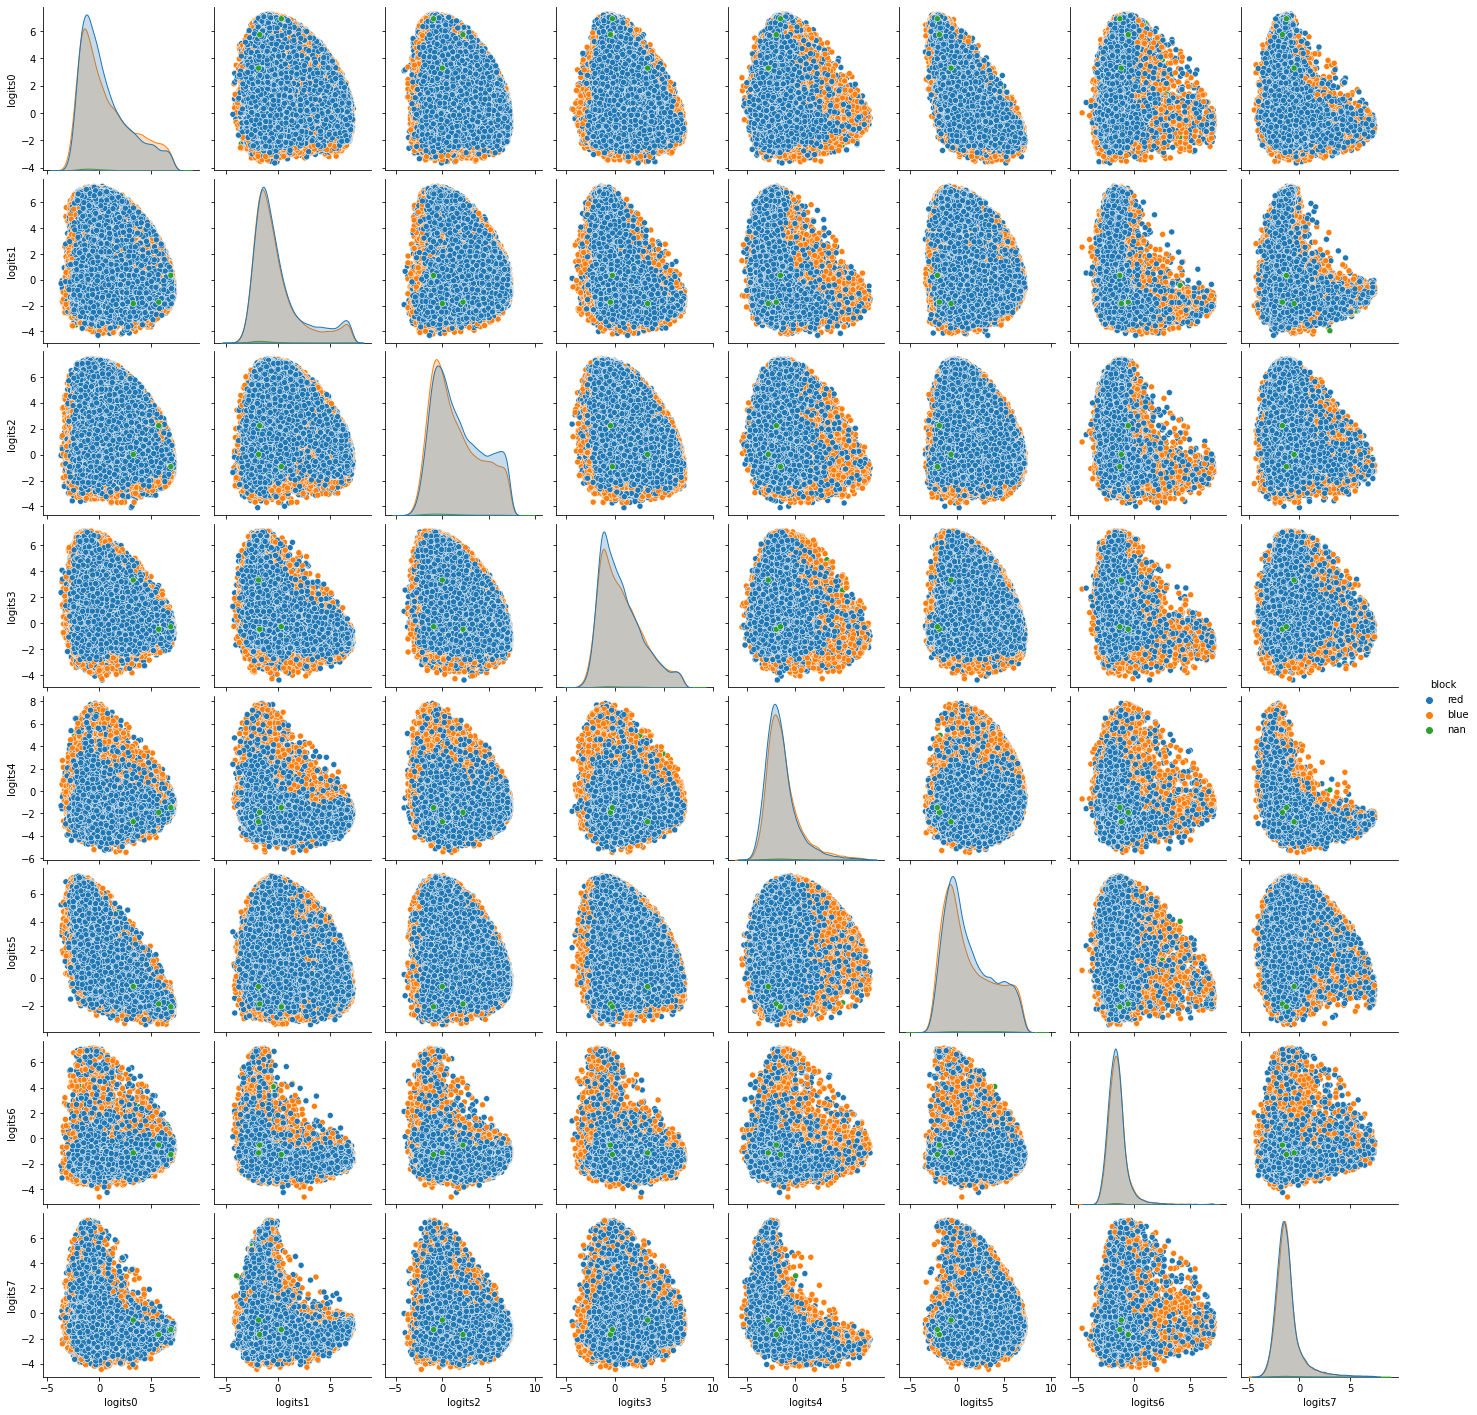

In [116]:
# use dict key as name
# a = x[:,0]
# b = x[:,1]
# c = x[:,2]
# d = x[:,3]
# e = x[:,4]
# f = x[:,5]
# g = x[:,6]
# h = x[:,7]

# d = dict(a=a, b=b, c=c, d=d, e=e, f=f, g=g, h=h)
# fig, ax = plt.subplots()
# for (xk, xv), (yk, yv) in itertools.combinations(d.items(), 2):
#     ax.scatter(xv, yv, label=f'({xk}, {yk})')
# ax.legend()
# plt.show()

sb.pairplot(principalDf, hue = 'block')

### Perform PCA

In [120]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [121]:
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)
finalDf

,principal component 1,principal component 2,block
0,-0.753574,-4.243129,red
1,-4.983401,2.442238,red
2,0.766032,-2.914551,red
3,4.752651,-0.532314,red
4,-2.354723,-0.954742,red
...,...,...,...
53337,NaN,NaN,red
53338,NaN,NaN,red
53339,NaN,NaN,nan
53340,NaN,NaN,nan


### Show Plot of the Dimension-Reduced Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


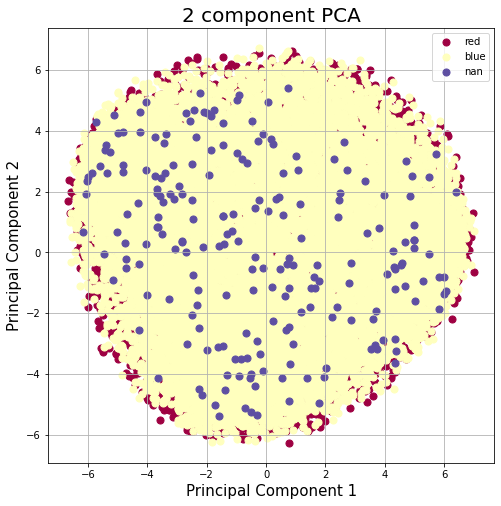

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['red', 'blue', 'nan']
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(targets))]
for targ, color in zip(targets,colors):
    indicesToKeep = finalDf[target] == targ
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Variance Explained

In [124]:
pca.explained_variance_ratio_

array([0.29709095, 0.23082346])

# Clustering

K-means, CURE and DBSCAN?

### DBSCAN

In [169]:
dbscan_cluster = DBSCAN(eps=1.31, min_samples=2000).fit(principalDf) # eps = 1.5 min_samples = 218
core_samples_mask = np.zeros_like(dbscan_cluster.labels_, dtype=bool)
core_samples_mask[dbscan_cluster.core_sample_indices_] = True
dbscan_labels = dbscan_cluster.labels_
dbscan_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
Counter(dbscan_labels).most_common()

[(0, 23437), (-1, 10193), (1, 9708)]

In [125]:
Counter(df['block']).most_common()

[('red', 22046), ('blue', 21074), ('nan', 218)]

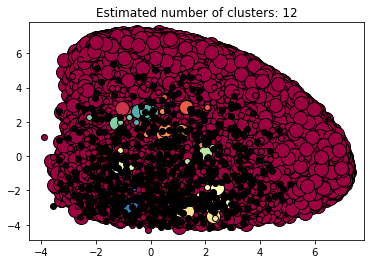

In [21]:
dbscan_unique_labels = set(dbscan_labels)
n_clusters_ = len(dbscan_unique_labels) - (1 if -1 in dbscan_labels else 0)


# Black removed and is used for noise instead.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dbscan_unique_labels))]
for k, col in zip(dbscan_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbscan_labels == k

    xy = principalDf[class_member_mask & core_samples_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = principalDf[class_member_mask & ~core_samples_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### K-Means

In [171]:
principalDf = df[features]
principalDf

kmeans_cluster = KMeans(n_clusters=2, random_state=0).fit(principalDf)
kmeans_labels = kmeans_cluster.labels_
kmeans_labels

array([1, 1, 1, ..., 1, 1, 1])

In [180]:
translate = {1: 'red', 0: 'blue'}
sum([translate[lab] for lab in kmeans_labels] == df['block']) / len(df)

0.50503022751396

In [172]:
Counter(kmeans_labels).most_common()

[(1, 24860), (0, 18478)]

In [174]:
Counter(df['block']).most_common()

[('red', 22046), ('blue', 21074), ('nan', 218)]

### Performing K-Means on only some of the dimensions

In [198]:
principalDf = df[['logits0', 'logits6', 'logits7']]
principalDf

kmeans_cluster = KMeans(n_clusters=2, random_state=0).fit(principalDf)
kmeans_labels = kmeans_cluster.labels_
kmeans_labels

array([0, 1, 0, ..., 1, 1, 1])

In [199]:
translate = {1: 'red', 0: 'blue'}
sum([translate[lab] for lab in kmeans_labels] == df['block']) / len(df)

0.474272001476764

In [193]:
Counter(kmeans_labels).most_common()

[(0, 30670), (1, 12668)]

In [174]:
Counter(df['block']).most_common()

[('red', 22046), ('blue', 21074), ('nan', 218)]

### Plotting

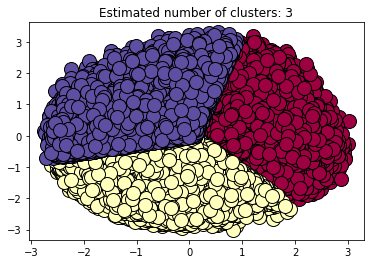

In [30]:
kmeans_unique_labels = set(kmeans_labels)
n_clusters_ = len(kmeans_unique_labels) - (1 if -1 in kmeans_labels else 0)


# Black removed and is used for noise instead.
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(kmeans_unique_labels))]
for k, col in zip(kmeans_unique_labels, colors):
    class_member_mask = kmeans_labels == k

    xy = principalDf[class_member_mask].to_numpy()
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Evaluating the clustering (Davies-Bouldin index)